In [1]:
class parabolic():
	"""It is the implementation of successive parabolic interpolation."""

	def __init__(self,func,lower,upper,tol=1e-5):

		self.lower = lower
		self.upper = upper

		self._tol = tol

		self._calls = 0

		self._iterate(func)

	def _iterate(self,func):

		x0,x2 = float(self.lower),float(self.upper)

		f0,f2 = self._call(func,x0),self._call(func,x2)

		x1 = (x0+x2)/2
		
		f1 = self._call(func,x1)

		while abs(x2-x0)>self._tol:

			x3 = self._minima(x0,x1,x2,f0,f1,f2)

			f3 = self._call(func,x3)

			x0,f0 = x1,f1
			x1,f1 = x2,f2
			x2,f2 = x3,f3

		self.solution = x2

		self.minima = f2

	def _call(self,func,x):

		self._calls += 1

		return func(x)

	@staticmethod
	def _minima(x0,x1,x2,f0,f1,f2):

		alpha = (f1-f0)/(x1-x0)
		betta = (f2-f0-alpha*(x2-x0))/(x2-x0)/(x2-x1)

		return (x0+x1)/2-alpha/(2*betta)

	@property
	def calls(self):

		return self._calls

9 0.7071071604675768 0.07111805751977002


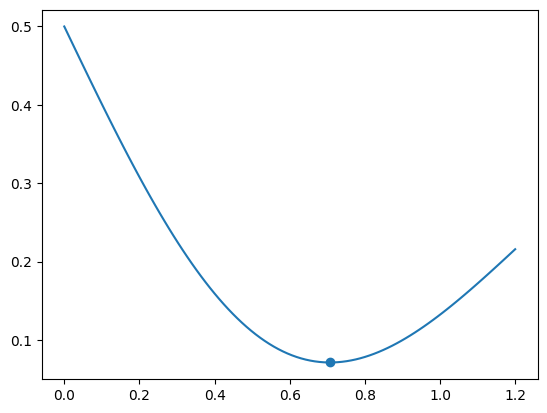

In [2]:
import matplotlib.pyplot as plt

import numpy as np

def objective(x):
    return 0.5-x*np.exp(-x**2)

x = np.linspace(0,1.2,100)

o = objective(x)

pb = parabolic(objective,0,1.2,tol=1e-2)

print(pb.calls,pb.solution,pb.minima)

plt.plot(x,o)
plt.scatter(pb.solution,pb.minima)
plt.show()